<a href="https://colab.research.google.com/github/Code-RED-LionKing/Likelion-Jejubase/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0_0531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 85.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [6]:
data = pd.read_excel('/content/jeju_place.xlsx')
data.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [9]:
place = data

In [10]:
place['중분류 카테고리'].unique()

array(['기타관광', '쇼핑', '자연관광', '문화관광', '레저스포츠', '체험관광', '역사관광'],
      dtype=object)

In [11]:
#null 값 확인
place.isnull().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [15]:
mid_cat = place['중분류 카테고리'].value_counts()
mid_cat

자연관광     138
문화관광     137
기타관광      94
레저스포츠     79
쇼핑        31
역사관광      14
체험관광       7
Name: 중분류 카테고리, dtype: int64

<Axes: ylabel='중분류 카테고리'>

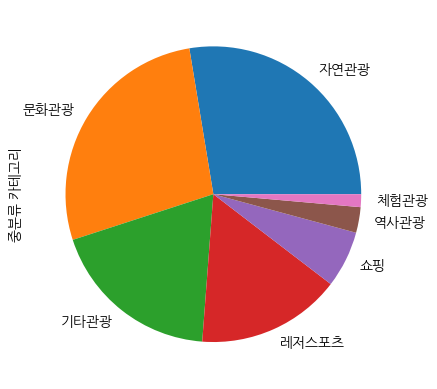

In [25]:
mid_cat.plot(kind = 'pie')

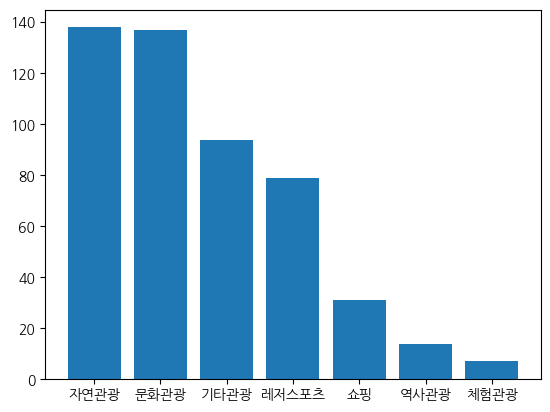

In [18]:
plt.bar(mid_cat.index, mid_cat)
plt.show()

In [20]:
low_cat = place['소분류 카테고리'].value_counts()
low_cat

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
교통시설           15
수상레저스포츠        13
복합관광시설         13
공연시설           12
자연공원           11
역사유적지           9
대형마트            9
기타문화관광지         8
자연관광(산)         8
농/산/어촌체험        6
종교성지            5
면세점             3
랜드마크관광          3
자연생태            2
레저스포츠시설         2
웰니스관광           1
쇼핑몰             1
Name: 소분류 카테고리, dtype: int64

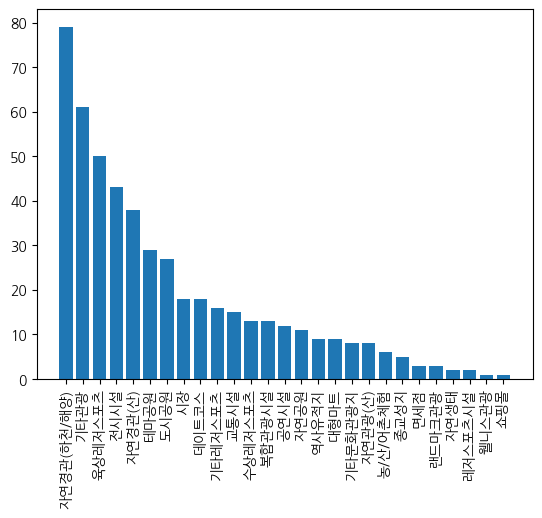

In [24]:
plt.bar(low_cat.index, low_cat)
plt.xticks(rotation=90) #90도 회전. 안하면 글씨겹친다.
plt.show()

<Axes: ylabel='소분류 카테고리'>

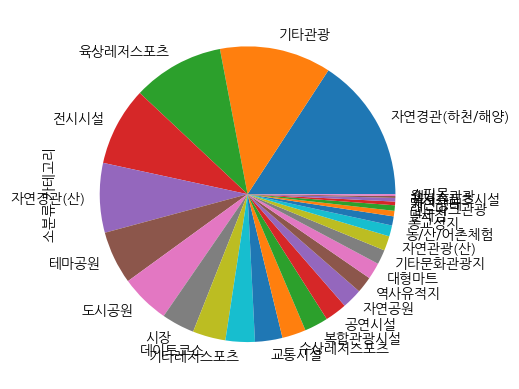

In [26]:
low_cat.plot(kind = 'pie')

In [27]:
#소분류 카테고리의 경우 -> 상위 10개 값만 이용
print(low_cat.head(10))
#print(low_cat[:10])

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
Name: 소분류 카테고리, dtype: int64


In [28]:
#place 데이터 프레임에서 소분류 상위 10개 값 가져오기
# place['소분류 카테고리'].head(10) 이거아님.

0           교통시설
1             시장
2             시장
3    자연경관(하천/해양)
4        자연경관(산)
5    자연경관(하천/해양)
6    자연경관(하천/해양)
7           전시시설
8           기타관광
9    자연경관(하천/해양)
Name: 소분류 카테고리, dtype: object

In [32]:
place['소분류 카테고리'].value_counts().head(15)

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
교통시설           15
수상레저스포츠        13
복합관광시설         13
공연시설           12
자연공원           11
Name: 소분류 카테고리, dtype: int64

In [36]:
tow_low = place['소분류 카테고리'].value_counts().head(10).index.values
tow_low

array(['자연경관(하천/해양)', '기타관광', '육상레저스포츠', '전시시설', '자연경관(산)', '테마공원',
       '도시공원', '시장', '데이트코스', '기타레저스포츠'], dtype=object)

In [65]:
# place[place["소분류 카테고리"].isin(place["소분류 카테고리"].value_counts()[:10].index)] #이건 읽기 어별로다 내생각엔
top_10 = place["소분류 카테고리"].value_counts().head(10).index
filtered_place = place.query("`소분류 카테고리` in @top_10")
filtered_place

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
...,...,...,...,...,...,...,...,...
490,491,새미은총의동산,제주특별자치도,제주시,제주 제주시,문화관광,도시공원,1936
493,492,금능해안도로,제주특별자치도,제주시,제주 제주시,기타관광,데이트코스,1923
494,495,조천만세동산,제주특별자치도,제주시,제주 제주시,문화관광,도시공원,1913
496,497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908


In [43]:
nature = place['관광지명']
nature

0         제주국제공항
1         동문재래시장
2      서귀포매일올레시장
3         함덕해수욕장
4          성산일출봉
         ...    
495       퍼시픽마리나
496        쉬리의언덕
497         선운정사
498        난타공연장
499       쇠와꽃승마장
Name: 관광지명, Length: 500, dtype: object

In [48]:
# 자연경관

nature = place[place['소분류 카테고리'] == '자연경관(하천/해양)']
nature


,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
...,...,...,...,...,...,...,...,...
454,455,하효항,제주특별자치도,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292
473,474,구두미포구,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068
482,483,제주항,제주특별자치도,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997
484,485,김녕포구,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),1974


In [49]:
# 자연 경관에 대해 검색건수
nature['검색건수'].sum()

1742995

In [50]:
nature['관광지명'].unique() # nature 자연 경관 -> 바다에 관련된 정보

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '성산항', '광치기해변', '사계해수욕장', '세화해수욕장',
       '운진항', '판포포구', '모슬포항', '제주항제6부두', '삼양해수욕장', '제주항제4부두', '애월항',
       '황우지해안', '화순금모래해변', '법환포구', '한담해변', '하우목동항', '한림항', '홍조단괴해빈',
       '논짓물', '검멀레해수욕장', '도두항', '천진항', '구엄리돌염전', '서귀포항', '위미항', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두',
       '보목포구', '신창풍차해안', '가파도', '화순항', '하고수동해수욕장', '대평포구', '사계항', '차귀도',
       '신도포구', '강정포구', '코난해변', '용수리포구', '제주항제9부두', '월령포구', '자구내포구',
       '구엄포구', '종달리해변', '제주항제7부두', '하모해수욕장', '세기알해변', '고내포구', '차귀도포구',
       '쇠소깍해변', '월평포구', '대포포구', '남원포구', '신흥해수욕장', '영락리방파제', '용담포구',
       '소금막해변', '수산저수지', '신창항', '하효항', '구두미포구', '제주항', '김녕포구', '동일리포구'],
      dtype=object)

In [51]:
# 관광지 초점 -> 항구, 포구, 염점, 부두, 저수기 .. 제외 -> 해수욕장

# '항' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-1] == '항'].index, axis=0)

In [52]:
# '포구' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '포구'].index, axis=0)

In [53]:
# 정리된 바다 데이터의 기초 통계 확인
nature.describe()

,순위,검색건수
count,44.000000,44.000000
mean,186.886364,31752.318182
std,138.644135,46346.721326
min,4.000000,2412.000000
25%,54.250000,5331.250000
50%,192.000000,9957.000000
75%,295.500000,39322.000000
max,444.000000,195477.000000


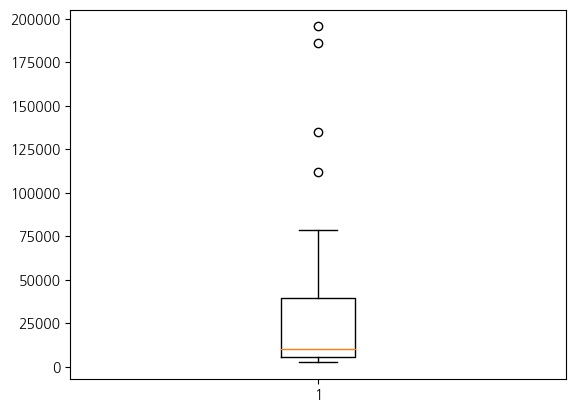

In [54]:
# q1, q2, q3 * 1.5 -> 초과: 이상치 -> 검색량이 너무 많다 -> 혼잡도가 높다.

plt.boxplot(nature['검색건수'])
plt.show()

In [59]:
# 상위 경계값 -> 혼잡도가 높다
# q3 - q1
IQR = 53093 - 6737
upper_IQR = (IQR * 1.5) + 53093
upper_IQR

122627.0

In [56]:
import numpy as np

In [60]:
# 상위 경계값을 초과하는 값들을 지워준다.
# 이상치이 때문에 인기가 많고 혼잡할 것이다.
nature['혼잡도'] = np.where(nature['검색건수'] > upper_IQR, '혼잡', '보통')
nature

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
6,7,이호테우해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
9,10,곽지해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
21,22,김녕해수욕장,제주특별자치도,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
22,23,금능해수욕장,제주특별자치도,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
28,29,중문색달해변,제주특별자치도,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
31,32,월정리해변,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
32,33,표선해수욕장,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통
39,40,광치기해변,제주특별자치도,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),49320,보통


In [63]:
top_10 = place["소분류 카테고리"].value_counts().head(10).index
filtered_place = place.query("`소분류 카테고리` in @top_10")
filtered_place


,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
5,6,협재해수욕장,제주특별자치도,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
...,...,...,...,...,...,...,...,...
490,491,새미은총의동산,제주특별자치도,제주시,제주 제주시,문화관광,도시공원,1936
493,492,금능해안도로,제주특별자치도,제주시,제주 제주시,기타관광,데이트코스,1923
494,495,조천만세동산,제주특별자치도,제주시,제주 제주시,문화관광,도시공원,1913
496,497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908


In [85]:
region = pd.read_csv('/content/region.csv')
region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [86]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     32 non-null     object
 1   서울      32 non-null     int64 
 2   부산      32 non-null     int64 
 3   대구      32 non-null     int64 
 4   인천      32 non-null     int64 
 5   광주      32 non-null     int64 
 6   대전      32 non-null     int64 
 7   울산      32 non-null     int64 
 8   세종      32 non-null     int64 
 9   경기      32 non-null     int64 
 10  강원      32 non-null     int64 
 11  충북      32 non-null     int64 
 12  충남      32 non-null     int64 
 13  전북      32 non-null     int64 
 14  전남      32 non-null     int64 
 15  경북      32 non-null     int64 
 16  경남      32 non-null     int64 
 17  제주      32 non-null     int64 
 18  검역      32 non-null     int64 
 19  총확진자수   32 non-null     int64 
dtypes: int64(19), object(1)
memory usage: 5.1+ KB


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [101]:
# weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
# set index
region = region.set_index('day')
region.index = pd.to_datetime(region.index, format='%Y-%m-%d')
region.head()

KeyError: ignored

In [102]:
region.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [90]:
region.isnull().sum()

서울       0
부산       0
대구       0
인천       0
광주       0
대전       0
울산       0
세종       0
경기       0
강원       0
충북       0
충남       0
전북       0
전남       0
경북       0
경남       0
제주       0
검역       0
총확진자수    0
dtype: int64

In [91]:
#전국 확진자수
region['서울']

day
2020-03-01     82
2020-03-02     91
2020-03-03     98
2020-03-04     99
2020-03-05    103
2020-03-06    105
2020-03-07    108
2020-03-08    120
2020-03-09    130
2020-03-10    141
2020-03-11    193
2020-03-12    212
2020-03-13    225
2020-03-14    238
2020-03-15    247
2020-03-16    253
2020-03-17    265
2020-03-18    270
2020-03-19    282
2020-03-20    299
2020-03-21    314
2020-03-22    324
2020-03-23    330
2020-03-24    334
2020-03-25    347
2020-03-26    360
2020-03-27    372
2020-03-28    390
2020-03-29    410
2020-03-30    426
2020-03-31    450
2020-04-01    474
Name: 서울, dtype: int64

In [92]:
region.columns[:-1]

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

In [103]:
total = region.loc[:, '총확진자수']
total.loc()

<Axes: xlabel='day'>

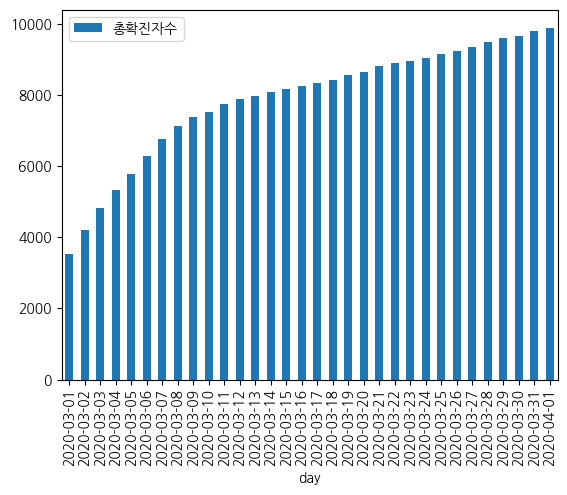

In [106]:
data.plot(kind = 'bar',x = 'day', y = '총확진자수')

In [109]:
# 전국 확진자수
# region.iloc[0:2] # iloc 행으로 접근한 열 # loc도 인덱스(행)
# cities = ['서울', '부산', '대구', '인천', '광주', '대전']
# loc[인덱스, 컬럼] -> 특정 값
cities = region.loc[:, region.columns[:-1]]

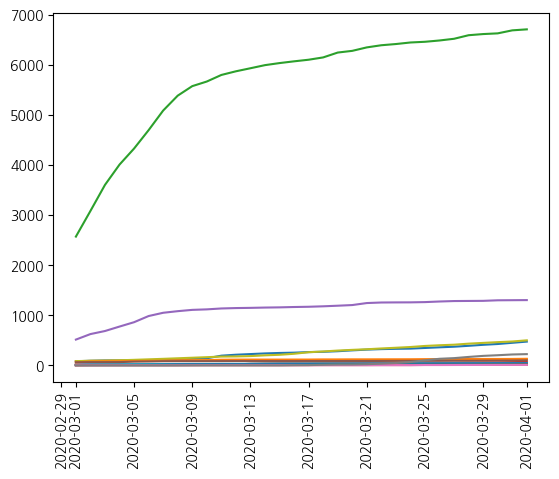

In [110]:
# 지역별 그래프
# 지역(y)만 다르고 인덱스(x) 동일
# 하나의 영역 안에 여러 그래프
# Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
#       '전북', '전남', '경북', '경남', '제주', '검역'],
#      dtype='object')

plt.xticks(rotation=90)
plt.plot(cities)
# plt.plot(cities['부산'])
plt.show()

TypeError: ignored

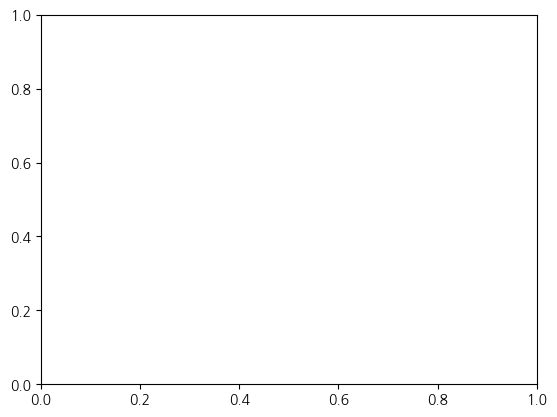

In [113]:
# 누적 그래프
# plt.stackplot(x, y1, y2, y3 , ... , labels=)
y1 = cities['서울']
y2 = cities['대구']
y3 = cities['부산']
y4 = cities['인천']
y5 = cities['광주']
labels = ['서울', '대구', '부산', '인천', '광주']

plt.stackplot(cities.columns, cities.index[0], c)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()